Columns: ['path', 'wav', 'true', 'pred', 'corpus', 'modality', 'channel', 'emotion', 'intensity', 'statement', 'repetition', 'actor']
Number of mis-classified samples: 37

Top 10 actors with the most errors:
 actor
3     3
9     3
23    3
19    3
11    3
10    3
7     2
13    2
12    2
20    2
Name: count, dtype: int64


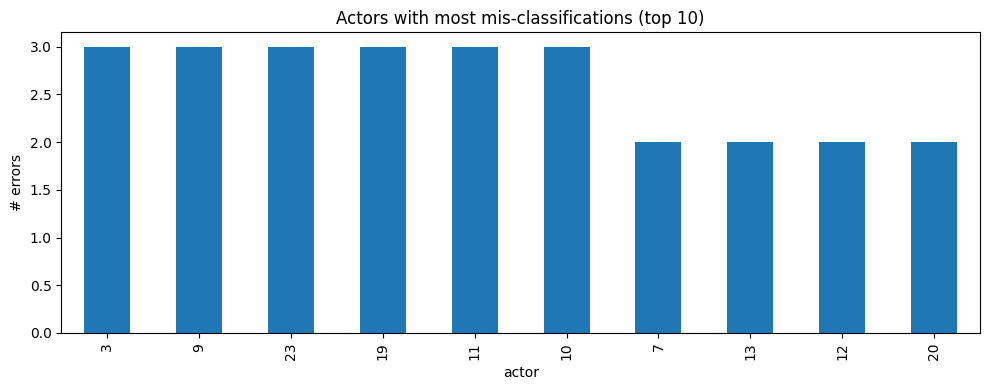


Errors by intensity (1 = normal, 2 = strong):
 intensity
1    24
2    13
Name: count, dtype: int64


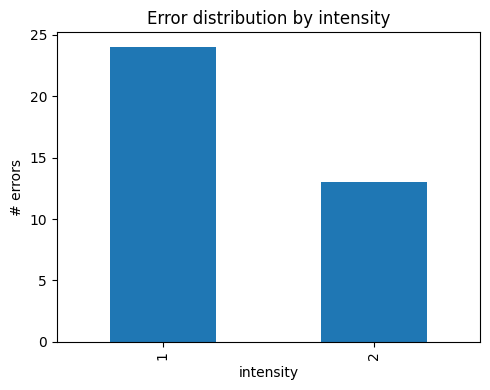


Confusion matrix of mistakes (true x pred):
 pred  0  1  2  3  4  5  6
true                     
0     0  2  2  0  0  1  0
1     0  0  1  0  1  1  2
2     2  2  0  1  1  0  1
3     0  2  0  0  0  5  0
4     0  0  2  1  0  1  0
5     0  0  0  2  0  0  2
6     0  1  0  1  1  2  0


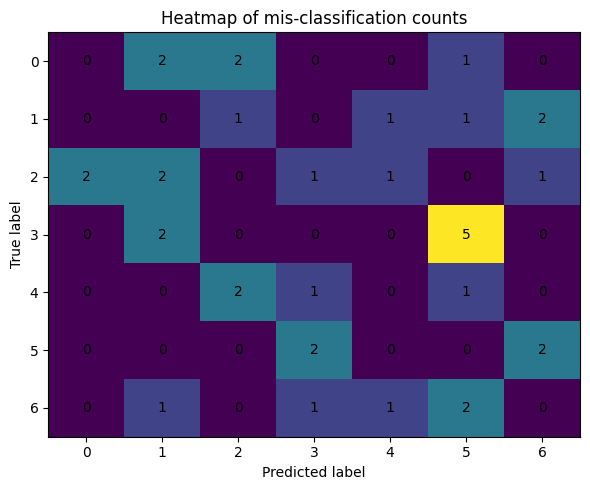

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Load the CSV ----------
csv_path = "output/images/misclassified.csv"   # change if your file lives elsewhere
df = pd.read_csv(csv_path)

# ---------- 2. Basic sanity check ----------
print("Columns:", list(df.columns))
print("Number of mis-classified samples:", len(df))

# ---------- 3. Error count per actor ----------
if 'actor' in df.columns:
    actor_err = df['actor'].value_counts().sort_values(ascending=False)
    print("\nTop 10 actors with the most errors:\n", actor_err.head(10))

    plt.figure(figsize=(10,4))
    actor_err.head(10).plot(kind='bar')
    plt.ylabel("# errors")
    plt.title("Actors with most mis-classifications (top 10)")
    plt.tight_layout()
    plt.show()

# ---------- 4. Error count per emotion ----------
if 'emotion_code' in df.columns:
    emo_err = df['emotion_code'].value_counts().sort_index()
    print("\nErrors per emotion code:\n", emo_err)

    plt.figure(figsize=(8,4))
    emo_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.title("Mis-classifications by emotion code")
    plt.tight_layout()
    plt.show()

# ---------- 5. Normal vs. strong intensity ----------
if 'intensity' in df.columns:
    intens_err = df['intensity'].value_counts().sort_index()
    print("\nErrors by intensity (1 = normal, 2 = strong):\n", intens_err)

    plt.figure(figsize=(5,4))
    intens_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.title("Error distribution by intensity")
    plt.tight_layout()
    plt.show()

# ---------- 6. Confusion matrix of true vs. predicted emotion ----------
if {'true', 'pred'}.issubset(df.columns):
    conf = pd.crosstab(df['true'], df['pred'])
    print("\nConfusion matrix of mistakes (true x pred):\n", conf)

    plt.figure(figsize=(6,5))
    plt.imshow(conf, interpolation='nearest', aspect='auto')
    plt.xticks(range(conf.shape[1]), conf.columns)
    plt.yticks(range(conf.shape[0]), conf.index)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Heatmap of mis-classification counts")
    for i in range(conf.shape[0]):
        for j in range(conf.shape[1]):
            plt.text(j, i, conf.iloc[i, j], ha='center', va='center')
    plt.tight_layout()
    plt.show()


In [3]:
df

,path,wav,true,pred,corpus,modality,channel,emotion,intensity,statement,repetition,actor
0,dataset/features/5/1746075579143.npy,dataset/Audio_Speech_Actors_01-24/Actor_15/03-...,5,6,RAVDESS,3,1,7,2,2,2,15
1,dataset/features/5/1746075579756.npy,dataset/Audio_Speech_Actors_01-24/Actor_22/03-...,5,3,RAVDESS,3,1,7,1,1,1,22
2,dataset/features/5/1746075582904.npy,dataset/Audio_Speech_Actors_01-24/Actor_13/03-...,5,6,RAVDESS,3,1,7,1,1,2,13
3,dataset/features/5/1746075583204.npy,dataset/Audio_Speech_Actors_01-24/Actor_12/03-...,5,3,RAVDESS,3,1,7,2,2,2,12
4,dataset/features/0/1746075584614.npy,dataset/Audio_Speech_Actors_01-24/Actor_09/03-...,0,1,RAVDESS,3,1,1,1,1,1,9
5,dataset/features/0/1746075584885.npy,dataset/Audio_Speech_Actors_01-24/Actor_20/03-...,0,2,RAVDESS,3,1,1,1,1,1,20
6,dataset/features/0/1746075586266.npy,dataset/Audio_Speech_Actors_01-24/Actor_07/03-...,0,2,RAVDESS,3,1,1,1,2,2,7
7,dataset/features/0/1746075586791.npy,dataset/Audio_Speech_Actors_01-24/Actor_02/03-...,0,1,RAVDESS,3,1,1,1,1,2,2
8,dataset/features/0/1746075587057.npy,dataset/Audio_Speech_Actors_01-24/Actor_03/03-...,0,5,RAVDESS,3,1,1,1,1,2,3
9,dataset/features/6/1746075587324.npy,dataset/Audio_Speech_Actors_01-24/Actor_09/03-...,6,5,RAVDESS,3,1,8,1,2,2,9



Errors by statement code:
 statement
1    22
2    15
Name: count, dtype: int64


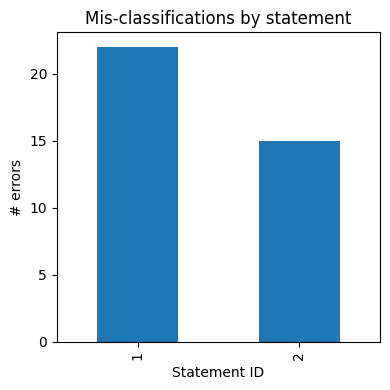


Errors by repetition (take):
 repetition
1    15
2    22
Name: count, dtype: int64


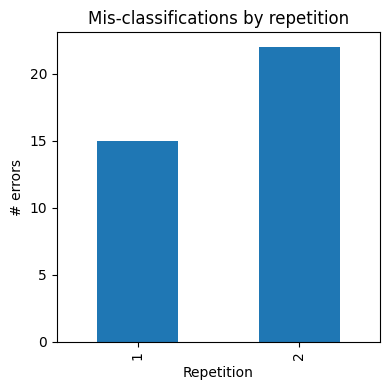

In [4]:
if 'statement' in df.columns:
    stmt_err = df['statement'].value_counts().sort_index()
    print("\nErrors by statement code:\n", stmt_err)

    plt.figure(figsize=(4,4))
    stmt_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.xlabel("Statement ID")
    plt.title("Mis-classifications by statement")
    plt.tight_layout()
    plt.show()

# ---------- 4. Errors by REPETITION (RAVDESS: 1st vs 2nd take) ----------
if 'repetition' in df.columns:
    rep_err = df['repetition'].value_counts().sort_index()
    print("\nErrors by repetition (take):\n", rep_err)

    plt.figure(figsize=(4,4))
    rep_err.plot(kind='bar')
    plt.ylabel("# errors")
    plt.xlabel("Repetition")
    plt.title("Mis-classifications by repetition")
    plt.tight_layout()
    plt.show()